In [304]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [320]:
df_shanghai = pd.read_csv('sh_new_clean.csv', index_col = 0)
df_hangzhou = pd.read_csv('hz_new_clean.csv', index_col = 0)

In [321]:
df_shanghai.head()

,house_name,total_price,unit_price,unit_price_desc,type,location1,area,total_price_min,total_price_max,area_min,area_max
0,滨江一品苑,总价1600-2597(万/套),117000.0,元/㎡(均价),住宅,浦东,建面 136-234㎡,1600.0,2597.0,136.0,234.0
1,红星临港天铂,总价297-330(万/套),33000.0,元/㎡(均价),住宅,浦东,建面 90-130㎡,297.0,330.0,90.0,130.0
2,中建·玖里书香,总价273(万/套),28690.0,元/㎡(均价),住宅,浦东,建面 60-99㎡,273.0,273.0,60.0,99.0
3,上城院子,总价750-800(万/套),54390.0,元/㎡(均价),住宅,宝山,建面 101-135㎡,750.0,800.0,101.0,135.0
4,万科天空之城,总价707(万/套),58600.0,元/㎡(均价),住宅,青浦,建面 75-160㎡,707.0,707.0,75.0,160.0


In [322]:
df_hangzhou.head()

,house_name,total_price,unit_price,unit_price_desc,type,location1,area,total_price_min,total_price_max,area_min,area_max
0,赞成星谷,总价100-188(万/套),25000.0,元/㎡(均价),商业类,拱墅,建面 42-64㎡,100.0,188.0,42.0,64.0
1,同协金座,总价157-210(万/套),33000.0,元/㎡(均价),商业类,上城,建面 45-73㎡,157.0,210.0,45.0,73.0
2,蓝城久宸里,总价1850-3600(万/套),80000.0,元/㎡(均价),商业类,上城,建面 255-515㎡,1850.0,3600.0,255.0,515.0
3,云悦湾,总价170-243(万/套),40000.0,元/㎡(均价),商业类,上城,建面 41-58㎡,170.0,243.0,41.0,58.0
4,世茂西溪宸悦,总价152-588(万/套),42000.0,元/㎡(均价),商业类,西湖,建面 38-168㎡,152.0,588.0,38.0,168.0


In [323]:
df_shanghai['total_price_mean'] = df_shanghai[['total_price_min', 'total_price_max']].mean(axis = 1)
df_hangzhou['total_price_mean'] = df_hangzhou[['total_price_min', 'total_price_max']].mean(axis = 1)

In [324]:
df_shanghai[['area_mean']] = df_shanghai[['area_min', 'area_max']].mean(axis = 1)
df_hangzhou[['area_mean']] = df_hangzhou[['area_min', 'area_max']].mean(axis = 1)

In [325]:
# 发现上海、杭州的数据中都混入了一些其他市的数据
# 安吉、吴兴 属于 湖州
# '嵊州市'、'海宁市' '德清县' '长兴县' '越城区' '桐乡市' '柯桥区' '海盐县' '上虞区' '南湖区' '嘉善县' '诸暨市'
# '秀洲区' 应该都不是杭州的区
print('sh:',df_shanghai.location1.unique())
print('\nhz:',df_hangzhou.location1.unique())

sh: ['浦东' '宝山' '青浦' '金山' '上海周边' '松江' '闵行' '普陀' '嘉定' '崇明' '奉贤' '杨浦' '长宁' '虹口'
 '静安' '黄浦' '徐汇' '安吉县' '吴兴区']

hz: ['拱墅' '上城' '西湖' '临安' '富阳' '萧山' '滨江' '余杭' '淳安' '临平区' '钱塘区' '建德' '桐庐' '嵊州市'
 '杭州湾新区' '海宁市' '德清县' '长兴县' '越城区' '桐乡市' '柯桥区' '海盐县' '上虞区' '南湖区' '嘉善县' '诸暨市'
 '秀洲区']


In [326]:
df_sh = df_shanghai[(~df_shanghai.location1.isin([ '安吉县', '吴兴区', '上海周边']))&(df_shanghai.type.isin(['住宅', '别墅']))].reset_index().drop(columns = ['index']).copy()
df_hz = df_hangzhou[~df_hangzhou.location1.isin(['嵊州市','海宁市','德清县','长兴县','越城区','桐乡市','柯桥区','海盐县','上虞区','南湖区','嘉善县','诸暨市','秀洲区', '杭州湾新区'])&(df_hangzhou.type.isin(['住宅', '别墅']))].reset_index().drop(columns = ['index']).copy()

In [327]:
df_sh = df_sh[['house_name',
              'total_price', 'total_price_min', 'total_price_max','total_price_mean',
              'unit_price', 'unit_price_desc', 
              'type','location1', 
              'area', 'area_min','area_max', 'area_mean']].copy()
df_hz = df_hz[['house_name',
              'total_price', 'total_price_min', 'total_price_max','total_price_mean',
              'unit_price', 'unit_price_desc', 
              'type','location1', 
              'area', 'area_min','area_max', 'area_mean']].copy()

In [328]:
df_sh.describe()

,total_price_min,total_price_max,total_price_mean,unit_price,area_min,area_max,area_mean
count,669.000000,669.000000,669.000000,693.000000,734.000000,734.000000,734.000000
mean,1164.122571,1248.715994,1206.419283,57629.887446,141.888283,191.141689,166.514986
std,3647.577895,3734.806943,3682.435364,37355.598731,111.151463,149.217053,125.480579
min,100.000000,111.000000,111.000000,343.000000,39.000000,53.000000,46.500000
25%,365.000000,391.000000,376.000000,35000.000000,85.250000,120.000000,102.500000
50%,585.000000,600.000000,600.000000,45800.000000,99.500000,140.500000,123.250000
75%,1050.000000,1110.000000,1100.000000,70000.000000,144.750000,200.000000,179.375000
max,85000.000000,85000.000000,85000.000000,450000.000000,1350.000000,1560.000000,1350.000000


In [329]:
df_hz.describe()

,total_price_min,total_price_max,total_price_mean,unit_price,area_min,area_max,area_mean
count,543.000000,543.000000,543.000000,524.000000,719.000000,719.000000,719.000000
mean,418.633517,434.563536,426.598527,29809.097328,123.273992,160.396384,141.835188
std,370.270526,377.292632,372.478288,13640.333946,54.441569,63.750275,56.494604
min,40.000000,66.000000,64.000000,8000.000000,30.000000,47.000000,44.000000
25%,200.000000,206.000000,204.000000,19780.000000,89.000000,127.000000,109.000000
50%,310.000000,322.000000,320.000000,26259.000000,103.000000,139.000000,121.000000
75%,509.500000,530.000000,525.000000,37500.000000,139.000000,177.500000,156.250000
max,2765.000000,2765.000000,2765.000000,100000.000000,540.000000,600.000000,540.000000


## 整体

上海-总价

<AxesSubplot:ylabel='Frequency'>

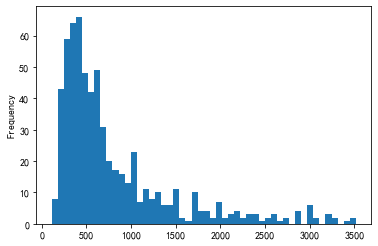

In [330]:
# 不考虑最高的5%，可以看到整体上总价1000W以内的比较多，
condition = (df_sh.total_price_mean<df_sh.total_price_mean.quantile(0.95))
df_sh.loc[condition, 'total_price_mean'].plot(kind = 'hist', bins = 50)
# df_sh.loc[:, 'total_price_mean'].plot(kind = 'hist', bins = 50)

In [331]:
# 总体而言，低价位的基本都在郊区（浦东较大，有可能在比较偏的地方，待确认）
print('0.1分位数：{}'.format(df_sh.total_price_mean.quantile(0.1)))
df_sh.loc[df_sh.total_price_mean < df_sh.total_price_mean.quantile(0.1)].location1.value_counts()

0.1分位数：274.59999999999997


金山    17
奉贤    16
浦东    14
崇明    10
青浦     4
松江     3
嘉定     3
Name: location1, dtype: int64

上海-单价

单价0.95分位数： 125399.99999999997


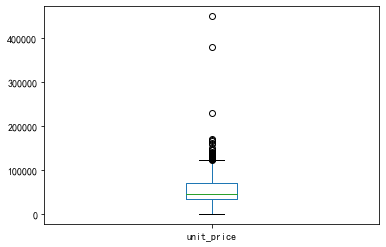

In [332]:
# 从单价箱图中可以看到，单价大部分在基本上13w内
df_sh.loc[:, 'unit_price'].plot(kind = 'box') 
# df_sh.loc[(df_sh.location1!='上海周边'), 'unit_price'].plot(kind = 'box')
print('单价0.95分位数：', df_sh.loc[:, 'unit_price'].quantile(0.95))

<AxesSubplot:ylabel='Frequency'>

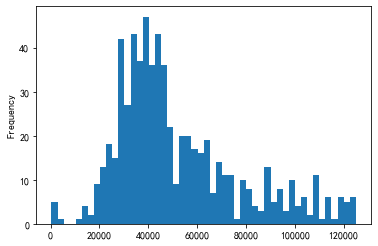

In [333]:
# 单价：较多集中在3、4W左右
condition = (df_sh.unit_price<df_sh.unit_price.quantile(0.95))
df_sh.loc[condition, 'unit_price'].plot(kind = 'hist', bins = 50)

杭州-总价

<AxesSubplot:ylabel='Frequency'>

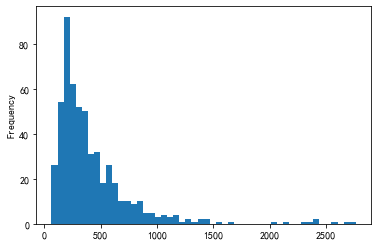

In [334]:
# 杭州还是总价在500W以内的挺多的
# df_hz.loc[:,'total_price_mean'].plot(kind = 'box')
df_hz.loc[:,'total_price_mean'].plot(kind = 'hist', bins = 50)

In [335]:
# 跟上海一样，杭州价格较低的新楼盘基本上是郊区的
print('0.1分位数：{}'.format(df_hz.total_price_mean.quantile(0.1)))
df_hz.loc[df_hz.total_price_mean<df_hz.total_price_mean.quantile(0.1), 'location1'].value_counts()

0.1分位数：153.0


临安     14
萧山     11
富阳      8
建德      8
钱塘区     5
淳安      5
余杭      1
临平区     1
桐庐      1
Name: location1, dtype: int64

杭州-单价

<AxesSubplot:>

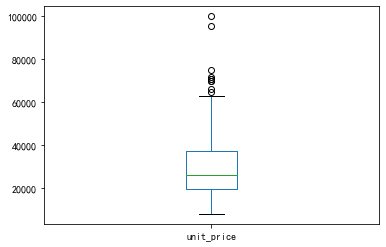

In [336]:
# 杭州单价还是集中在2万左右
df_hz.unit_price.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

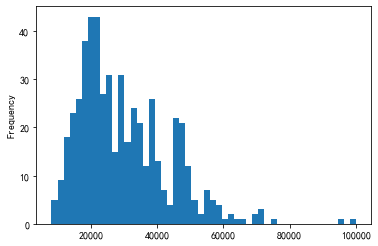

In [337]:
df_hz.unit_price.plot(kind = 'hist', bins = 50)

图片汇总

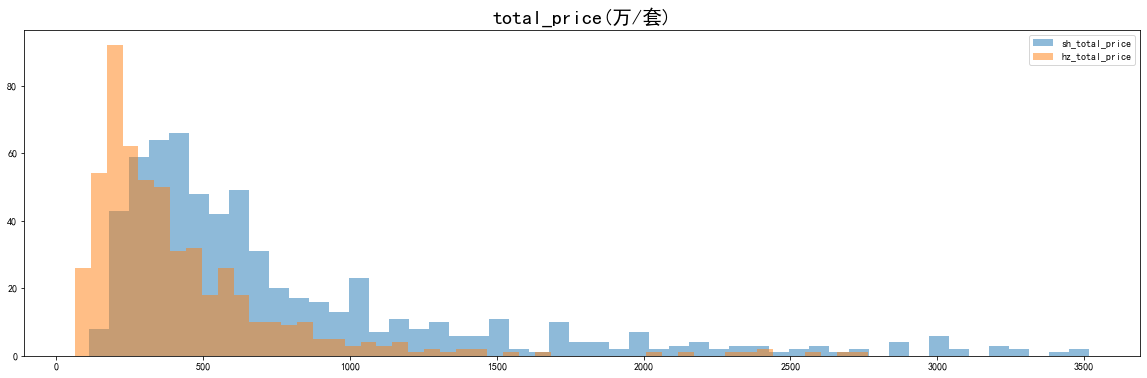

In [338]:
# 总价直方图
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(111)
condition = (df_sh.total_price_mean<df_sh.total_price_mean.quantile(0.95))
ax1.hist(df_sh.loc[condition, 'total_price_mean'], bins = 50, label = 'sh_total_price', alpha = 0.5)
ax1.hist(df_hz.loc[:, 'total_price_mean'], bins = 50, label = 'hz_total_price', alpha = 0.5)
ax1.legend()
ax1.set_title('total_price(万/套)', fontsize = 20)
plt.show()

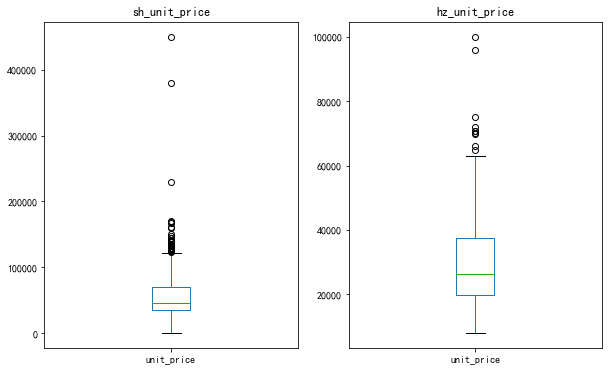

In [340]:
# 单价箱线图
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
df_sh.loc[:, 'unit_price'].plot(kind = 'box') 
ax1.set_title('sh_unit_price')
ax2 = fig.add_subplot(122)
df_hz.loc[:, 'unit_price'].plot(kind = 'box') 
ax2.set_title('hz_unit_price')
plt.show()

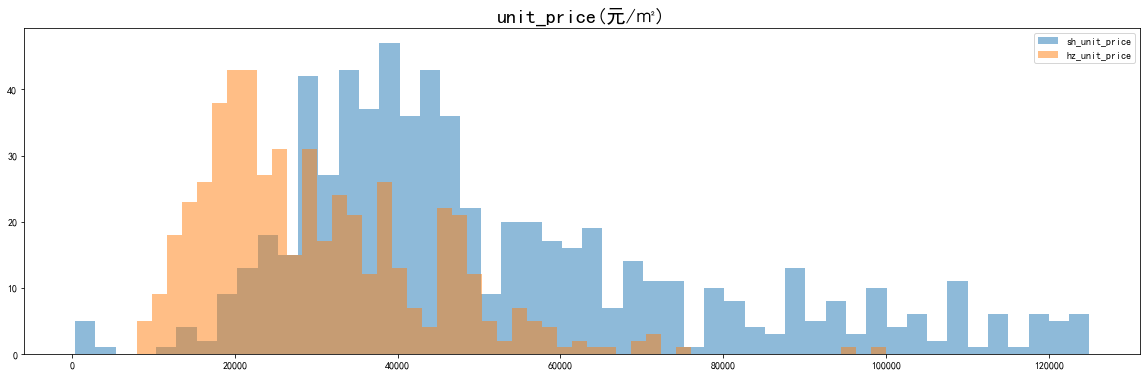

In [341]:
# 单价直方图
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(111)
condition = (df_sh.unit_price<df_sh.unit_price.quantile(0.95))
ax1.hist(df_sh.loc[condition, 'unit_price'], bins = 50, label = 'sh_unit_price', alpha = 0.5)
ax1.hist(df_hz.unit_price, bins = 50, label = 'hz_unit_price', alpha = 0.5)
ax1.legend()
ax1.set_title('unit_price(元/㎡)', fontsize = 20)
plt.show()

各区总价

In [359]:
sh_location_total_price = df_sh.groupby('location1')['total_price_mean'].describe().reset_index().sort_values(by = 'mean', ascending = False).copy()
sh_location_total_price

,location1,count,mean,std,min,25%,50%,75%,max
11,长宁,8.0,2391.250000,1909.101846,494.0,1308.375,1647.0,2730.875,6000.0
15,黄浦,8.0,2348.875000,1085.628118,1177.0,1656.000,2150.0,2625.000,4606.0
9,虹口,13.0,2238.500000,1690.666437,750.0,1320.000,1950.0,2425.000,7518.0
14,静安,19.0,2158.026316,1429.010463,805.0,1100.000,1700.0,2900.000,5505.0
8,浦东,126.0,2066.281746,8103.935372,184.0,355.750,600.0,1000.000,85000.0
4,徐汇,14.0,2030.392857,1828.564761,300.0,908.500,1500.0,2640.000,7400.0
5,普陀,19.0,1995.263158,1747.412240,720.0,975.000,1200.0,1900.000,6900.0
6,杨浦,13.0,1589.269231,929.800889,938.0,1002.000,1200.0,1800.000,4118.0
12,闵行,56.0,1441.089286,1194.407214,370.0,637.500,986.0,1920.750,5626.0
7,松江,68.0,967.183824,1174.056296,210.0,400.000,570.0,916.250,7125.0


In [356]:
# col_new_list = []
# for col in location_total_price.columns:
#     col_new_list.append('total_price_'+col)
    
# location_total_price.columns = col_new_list

In [360]:
hz_location_total_price = df_hz.groupby('location1')['total_price_mean'].describe().reset_index().sort_values(by = 'mean', ascending = False).copy()
hz_location_total_price

,location1,count,mean,std,min,25%,50%,75%,max
11,西湖,12.0,886.166667,558.533117,300.0,543.500,737.5,981.250,2400.0
0,上城,54.0,723.333333,584.977382,191.0,388.750,538.0,829.500,2765.0
3,余杭,57.0,597.114035,542.108409,138.0,236.000,371.0,700.000,2580.0
6,拱墅,33.0,577.181818,366.512317,250.0,356.000,451.0,694.000,2026.0
9,滨江,10.0,565.900000,161.660447,370.0,423.250,565.0,649.750,822.0
10,萧山,114.0,426.513158,259.096289,92.0,263.750,350.0,542.125,1678.0
4,富阳,46.0,329.510870,285.042112,72.0,185.750,228.0,336.375,1400.0
2,临平区,53.0,300.877358,185.058642,94.0,203.000,250.0,318.000,1249.5
12,钱塘区,42.0,282.547619,152.574125,108.0,169.750,214.0,392.250,728.5
1,临安,83.0,274.644578,173.446371,66.0,163.500,214.0,367.000,947.0


In [383]:
sh_location_total_price['city'] = 'sh'
hz_location_total_price['city'] = 'hz'
location_total_price = pd.concat([sh_location_total_price, hz_location_total_price]).reset_index().drop(columns = 'index').sort_values(by = 'mean', ascending = False)
location_total_price['cov'] = location_total_price['std']/location_total_price['mean']

In [384]:
location_total_price.sort_values(by = '50%', ascending = False).head(10)

,location1,count,mean,std,min,25%,50%,75%,max,city,cov
1,黄浦,8.0,2348.875000,1085.628118,1177.0,1656.000,2150.0,2625.000,4606.0,sh,0.462191
2,虹口,13.0,2238.500000,1690.666437,750.0,1320.000,1950.0,2425.000,7518.0,sh,0.755268
3,静安,19.0,2158.026316,1429.010463,805.0,1100.000,1700.0,2900.000,5505.0,sh,0.662184
0,长宁,8.0,2391.250000,1909.101846,494.0,1308.375,1647.0,2730.875,6000.0,sh,0.798370
5,徐汇,14.0,2030.392857,1828.564761,300.0,908.500,1500.0,2640.000,7400.0,sh,0.900597
7,杨浦,13.0,1589.269231,929.800889,938.0,1002.000,1200.0,1800.000,4118.0,sh,0.585049
6,普陀,19.0,1995.263158,1747.412240,720.0,975.000,1200.0,1900.000,6900.0,sh,0.875780
8,闵行,56.0,1441.089286,1194.407214,370.0,637.500,986.0,1920.750,5626.0,sh,0.828822
16,西湖,12.0,886.166667,558.533117,300.0,543.500,737.5,981.250,2400.0,hz,0.630280
4,浦东,126.0,2066.281746,8103.935372,184.0,355.750,600.0,1000.000,85000.0,sh,3.921990


各区单价

In [371]:
sh_location_unit_price = df_sh.groupby('location1')['unit_price'].describe().reset_index().sort_values(by = 'mean', ascending = False).copy()
sh_location_unit_price

,location1,count,mean,std,min,25%,50%,75%,max
15,黄浦,9.0,140600.000000,17703.177681,111000.0,128900.0,140000.0,145000.0,170000.0
9,虹口,13.0,119930.769231,34911.874403,89000.0,102000.0,113000.0,122000.0,230000.0
11,长宁,8.0,111500.000000,20763.979800,80000.0,91750.0,120000.0,126250.0,134000.0
4,徐汇,15.0,108969.066667,25108.014576,71000.0,95000.0,105000.0,125000.0,168750.0
14,静安,19.0,108906.210526,18854.062090,74808.0,91600.0,106800.0,127800.0,132400.0
6,杨浦,13.0,104359.230769,13301.470133,90000.0,94000.0,100000.0,110000.0,130000.0
5,普陀,19.0,99696.157895,19153.048276,72000.0,91513.5,95000.0,105000.0,167000.0
12,闵行,59.0,68243.271186,23001.082521,2244.0,55220.0,66000.0,78250.0,147000.0
8,浦东,129.0,66194.713178,55471.547023,343.0,33000.0,56500.0,72000.0,450000.0
13,青浦,87.0,49036.494253,15077.404201,1300.0,40000.0,44000.0,59750.0,81000.0


In [372]:
hz_location_unit_price = df_hz.groupby('location1')['unit_price'].describe().reset_index().sort_values(by = 'mean', ascending = False).copy()
hz_location_unit_price

,location1,count,mean,std,min,25%,50%,75%,max
11,西湖,11.0,50771.545455,18782.961669,34749.0,37662.0,50000.0,55707.00,100000.0
0,上城,57.0,46275.561404,13305.430411,28000.0,36800.0,45800.0,49000.00,95700.0
9,滨江,12.0,45378.500000,9980.537784,28000.0,41000.0,47550.0,49793.75,65981.0
6,拱墅,35.0,42878.142857,8605.244004,30489.0,36000.0,42000.0,47986.50,64800.0
3,余杭,49.0,32386.448980,12989.913863,13000.0,22596.0,29000.0,38000.00,75000.0
10,萧山,101.0,31547.881188,10611.598855,10000.0,25000.0,32000.0,37500.00,58000.0
2,临平区,47.0,25132.765957,5587.415091,18960.0,20900.0,23000.0,28250.00,42000.0
4,富阳,46.0,22144.543478,8123.524270,9486.0,18250.0,21050.0,24050.00,50200.0
12,钱塘区,41.0,22098.951220,7807.182084,11500.0,15500.0,19800.0,27205.00,37500.0
1,临安,86.0,20943.930233,6958.888471,9800.0,17000.0,19450.0,23035.25,49861.0


In [378]:
sh_location_unit_price['city'] = 'sh'
hz_location_unit_price['city'] = 'hz'
location_unit_price = pd.concat([sh_location_unit_price, hz_location_unit_price]).reset_index().drop(columns = 'index').sort_values(by = 'mean', ascending = False)

In [382]:
location_unit_price['cov'] = location_unit_price['std']/location_unit_price['mean']
location_unit_price.sort_values(by = '50%', ascending = False).head(10)

,location1,count,mean,std,min,25%,50%,75%,max,city,cov
0,黄浦,9.0,140600.000000,17703.177681,111000.0,128900.0,140000.0,145000.0,170000.0,sh,0.125912
2,长宁,8.0,111500.000000,20763.979800,80000.0,91750.0,120000.0,126250.0,134000.0,sh,0.186224
1,虹口,13.0,119930.769231,34911.874403,89000.0,102000.0,113000.0,122000.0,230000.0,sh,0.291100
4,静安,19.0,108906.210526,18854.062090,74808.0,91600.0,106800.0,127800.0,132400.0,sh,0.173122
3,徐汇,15.0,108969.066667,25108.014576,71000.0,95000.0,105000.0,125000.0,168750.0,sh,0.230414
5,杨浦,13.0,104359.230769,13301.470133,90000.0,94000.0,100000.0,110000.0,130000.0,sh,0.127458
6,普陀,19.0,99696.157895,19153.048276,72000.0,91513.5,95000.0,105000.0,167000.0,sh,0.192114
7,闵行,59.0,68243.271186,23001.082521,2244.0,55220.0,66000.0,78250.0,147000.0,sh,0.337045
8,浦东,129.0,66194.713178,55471.547023,343.0,33000.0,56500.0,72000.0,450000.0,sh,0.838006
16,西湖,11.0,50771.545455,18782.961669,34749.0,37662.0,50000.0,55707.0,100000.0,hz,0.369951
